<a href="https://colab.research.google.com/github/fpelogia/Optimization-and-Neural-Networks/blob/master/RedesNeurais_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neurais
[Voltar](https://colab.research.google.com/drive/1zGxVatpjlZtdtECAikT1eKP7EQ50m-Ur)

#6 - Utilizando bias em uma rede simples

[Solução de Mínimos Quadrados para esssa rede](https://drive.google.com/uc?id=1-zRaSOHeOVXekfD-SiP8cLvpecVaZN3G)

$$(w_1w_3 + w_2w_4) = 6$$
$$(w_3b_1 +b_2w_2+b_3) = -7$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1,ignore_biases = False):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        
        if not ignore_biases:
            self.bias_ih = np.random.rand(1,self.n_hidden)
            self.bias_ho = np.random.rand(1,self.n_outputs)
        else:
            self.bias_ih = np.zeros((1,self.n_hidden))
            self.bias_ho = np.zeros((1,self.n_outputs))

        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))
        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate
        self.ignoreb = ignore_biases

    def train_step(self, input,target):
        #  INPUT ====> HIDDEN
        hidden = np.dot(input, self.weight_ih)
        if not self.ignoreb:
            hidden = np.add(hidden,self.bias_ih)
        for i in range(len(hidden)):
            hidden[i] = act_func(hidden[i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        if not self.ignoreb:
            output = np.add(output,self.bias_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])
        
        
        
        
        #BACKPROPAGATION
        
        ## OUTPUT ==> HIDDEN 
        
        output_error = target - output   
        d_output = 1
        gradient = self.learning_rate*output_error*d_output

        if not self.ignoreb:
            self.bias_ho = np.add(self.bias_ho,gradient)
            
        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        self.weight_ho = np.add(self.weight_ho,weight_ho_deltas)
        
        ## HIDDEN ==> INPUT
        
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        d_hidden = 1
        gradient_H = self.learning_rate*hidden_error*d_hidden

        if not self.ignoreb:
            self.bias_ih = np.add(self.bias_ih,gradient_H)
            
        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)

        

    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)
        if not self.ignoreb:
            hidden = np.add(hidden,self.bias_ih)
        for i in range(len(hidden)):
            hidden[i] = act_func(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        if not self.ignoreb:
            output = np.add(output,self.bias_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])




a = [5.99707484]
b = [-7.5631021]


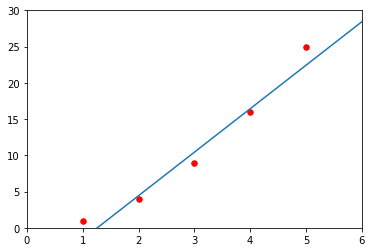

In [0]:
rede = RedeNeural(1,2,1,0.0005,False)
X = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [1.0, 4.0, 9.0, 16.0, 25.0]
rede.train(X,y,10000)


a = (rede.weight_ih[0][0]*rede.weight_ho[0] + 
     rede.weight_ih[0][1]*rede.weight_ho[1])
print('a = {}'.format(a))

b = (rede.weight_ho[0]*rede.bias_ih[0][0] + 
    rede.bias_ih[0][1]*rede.weight_ih[0][1]+
    rede.bias_ho[0])
print('b = {}'.format(b))

ex = np.linspace(0,6,10)
ey = a*ex + b

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)
